# Wage And Gini Distribution across Danish Municipalities

Imports and set magics:

In [404]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

## Wage

**Read the Wage data** in ``LIGELB1.xlsx`` and **clean it** removing and renaming columns:

In [405]:
# a. load
wage = pd.read_excel('LIGELB1.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
wage.drop(drop_these, axis=1, inplace=True)

# c. rename columns
wage.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

The dataset for wages in the different municipalities now looks like this:

In [406]:
#We remove Christiansø using our function and display the data:
wage = dataproject.only_keep_municipalities_and_Hele_Landet(wage)
wage.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


**Convert the dataset to long format**:

In [407]:
# a. rename year columns
mydict = {str(i):f'wage{i}' for i in range(2009,2019)}
wage.rename(columns = mydict, inplace=True)

# b. convert to long
wage_long = pd.wide_to_long(wage, stubnames='wage', i='municipality', j='year').reset_index()

# c. show
wage_long.head(5)

,municipality,year,wage
0,Hele landet,2009,35734
1,København,2009,36607
2,Frederiksberg,2009,41119
3,Dragør,2009,43215
4,Tårnby,2009,36147


## Gini

**Read the Wage data** in ``IFOR41.xlsx`` and **clean it** removing and renaming columns:

In [408]:
# a. load
gini = pd.read_excel('IFOR41.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0']
gini.drop(drop_these, axis=1, inplace=True)

# c. rename columns
gini.rename(columns = {'Unnamed: 1':'municipality'}, inplace=True)

In [409]:
#We remove Christiansø using our function and display the data:
gini = dataproject.only_keep_municipalities_and_Hele_Landet(gini)
gini.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


**Convert the dataset to long format**:

In [410]:
# a. rename year columns
mydict1 = {str(k):f'gini{k}' for k in range(2009,2020)}
gini.rename(columns = mydict1, inplace=True)

# b. convert to long
gini_long = pd.wide_to_long(gini, stubnames='gini', i='municipality', j='year').reset_index()

# c. show
gini_long.head()

,municipality,year,gini
0,Hele landet,2009,26.74
1,København,2009,29.38
2,Frederiksberg,2009,30.33
3,Dragør,2009,26.25
4,Tårnby,2009,21.40


## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the wage and gini coefficient  in each municipality

The **static plot** is:

In [411]:
def plot_wage_gini(wage,gini,dataset,municipality): 
    
    if dataset == 'wage':
        df = wage
        y = 'wage'
    else:
        df = gin
        y = 'gini'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plots** can be found below, where you are able to compare different municipalities against each other or the entire contry, for both the wage level and the gini coefficient. 

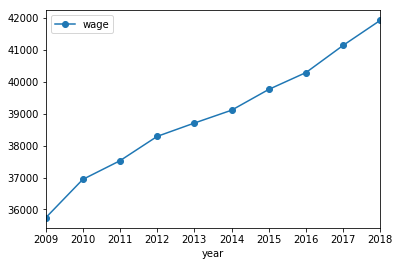

In [412]:
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. This means removing Christiansø from our datasets, so they represent the same municpalities and all of Denmark. Both our datasets contains the same years and municipalities after removing Christiansø.

In [413]:
print(f'Years in gini: {gini_long.year.unique()}')
print(f'Municipalities in gini_long = {len(gini_long.municipality.unique())}')
print(f'Years in wage: {wage_long.year.unique()}')
print(f'Municipalities in wage = {len(wage_long.municipality.unique())}')

merged = pd.merge(gini_long, wage_long ,how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

Years in gini: [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Municipalities in gini_long = 99
Years in wage: [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Municipalities in wage = 99
Number of municipalities = 99
Number of years          = 10


In [414]:
# We Merge the two datasets using pd.merge enabeling us to look a both wage level and gini coeffcient in the same table. 
joinboth = pd.merge(gini_long, wage_long,how='inner',on=['municipality','year'])
joinboth.head()

,municipality,year,gini,wage
0,Hele landet,2009,26.74,35734
1,København,2009,29.38,36607
2,Frederiksberg,2009,30.33,41119
3,Dragør,2009,26.25,43215
4,Tårnby,2009,21.40,36147


In [415]:
# Group data by municipality and year
joinboth2 = joinboth.groupby(['municipality','year','gini','wage']).sum().reset_index()
joinboth2.head()

,municipality,year,gini,wage
0,Aabenraa,2009,25.57,33192
1,Aabenraa,2010,25.09,34119
2,Aabenraa,2011,25.01,34825
3,Aabenraa,2012,24.83,35338
4,Aabenraa,2013,25.36,35615


In [416]:
# We construct a table for mean, min & max for each year. 
# We observe that both the mean, min and max has increased for both wage and gini during this period. 
joinboth2.groupby(['year']).agg(['mean','max','min']).round(2)

gini                    wage              
       mean    max    min      mean    max    min
year                                             
2009  25.28  42.42  20.40  35588.95  50949  31438
2010  25.50  43.42  21.65  36769.74  54630  31948
2011  25.48  42.83  20.94  37238.27  54940  32292
2012  25.11  42.13  20.71  37945.55  55481  32716
2013  25.50  43.39  21.51  38302.07  56118  32864
2014  25.73  43.98  21.44  38685.46  56279  33198
2015  26.04  47.77  22.03  39309.05  57422  33836
2016  26.38  45.02  22.50  39824.34  58411  34174
2017  26.58  45.44  21.63  40647.82  59791  34563
2018  26.40  44.50  22.88  41407.98  60720  35101

In [417]:
#In this table we look at mean, min and max for each municipality. 
joinboth3 = joinboth.groupby(['municipality','gini','wage']).sum().reset_index()
joinboth3.groupby(['municipality']).agg(['mean','std','max','min']).round(2)

gini                         wage                         \
                  mean   std    max    min     mean      std    max    min   
municipality                                                                 
Aabenraa         25.60  0.76  27.42  24.83  35671.2  1403.96  37806  33192   
Aalborg          27.31  1.02  28.70  25.72  37396.4  1933.46  40309  34294   
Aarhus           31.48  1.36  33.29  28.64  39497.7  2097.38  42623  35921   
Albertslund      25.14  0.46  25.68  23.99  37644.1  1520.02  39882  34895   
Allerød          25.24  0.63  26.34  24.23  49270.7  2327.06  52694  45247   
...                ...   ...    ...    ...      ...      ...    ...    ...   
Vejle            26.21  0.71  27.02  25.19  38435.7  2027.06  41575  35036   
Vesthimmerlands  24.79  1.34  28.33  23.94  33787.4  1592.52  36487  31575   
Viborg           24.74  0.63  25.84  23.81  36559.1  1781.68  39431  33661   
Vordingborg      24.87  0.73  25.82  23.81  36342.1  1507.84  38744  33777   
Ærø              25.61  0.85  27.17  24.44  34300.9  1400.29  36566  31866   

                   year                    
                   mean   std   max   min  
municipality                               
Aabenraa         2013.5  3.03  2018  2009  
Aalborg          2013.5  3.03  2018  2009  
Aarhus           2013.5  3.03  2018  2009  
Albertslund      2013.5  3.03  2018  2009  
Allerød          2013.5  3.03  2018  2009  
...                 ...   ...   ...   ...  
Vejle            2013.5  3.03  2018  2009  
Vesthimmerlands  2013.5  3.03  2018  2009  
Viborg           2013.5  3.03  2018  2009  
Vordingborg      2013.5  3.03  2018  2009  
Ærø              2013.5  3.03  2018  2009  

[99 rows x 12 columns]

## WAGE GRAFER

We change the type to an integer and group by municipality in order to make a graph the wage level in selected municipalities. 

In [418]:
wage_long['wage'] = wage_long['wage'].astype(int)
wage_grouped = wage_long.groupby('municipality')['wage']
print(wage_grouped.head(5))

0      35734
1      36607
2      41119
3      43215
4      36147
       ...  
490    33114
491    36916
492    33990
493    33057
494    36912
Name: wage, Length: 495, dtype: int64


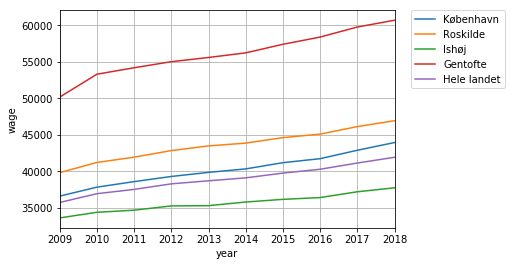

In [419]:
wage_mean = wage_grouped.mean() # mean wage
wage_mean.name = 'wage_mean' 
wage_test = wage_long.set_index('municipality').join(wage_mean, how='left')
wage_test['diff'] = wage_test.wage - wage_test.wage_mean
wage_test.xs('Gentofte')
municipalities2 = ['København','Roskilde','Ishøj','Gentofte','Hele landet']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for m in municipalities2:
    wage_test.xs(m).plot(x='year',y='wage',ax=ax,label=m)


ax.legend(frameon=True)
ax.set_ylabel('wage')
ax.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

The graph contains **Hele Landet**, **Ishøj**, **Gentofte**, **Roskilde**, and **København**
Which we have made seperat tables for below.

In [420]:
wage_hele_landet = wage_long.loc[wage_long['municipality'] == 'Hele landet', :]
wage_Ishøj = wage_long.loc[wage_long['municipality'] == 'Ishøj', :]
wage_Gentofte = wage_long.loc[wage_long['municipality'] == 'Gentofte', :]
wage_Roskilde = wage_long.loc[wage_long['municipality'] == 'Roskilde', :]
wage_København = wage_long.loc[wage_long['municipality'] == 'København', :]

In [421]:
(wage_hele_landet.head(10))

,municipality,year,wage
0,Hele landet,2009,35734
99,Hele landet,2010,36941
198,Hele landet,2011,37527
297,Hele landet,2012,38290
396,Hele landet,2013,38708
495,Hele landet,2014,39111
594,Hele landet,2015,39763
693,Hele landet,2016,40291
792,Hele landet,2017,41144
891,Hele landet,2018,41931


In [422]:
(wage_Ishøj.head(10))

,municipality,year,wage
14,Ishøj,2009,33619
113,Ishøj,2010,34389
212,Ishøj,2011,34680
311,Ishøj,2012,35264
410,Ishøj,2013,35299
509,Ishøj,2014,35797
608,Ishøj,2015,36164
707,Ishøj,2016,36409
806,Ishøj,2017,37201
905,Ishøj,2018,37748


In [423]:
(wage_Gentofte.head(10))

,municipality,year,wage
8,Gentofte,2009,50186
107,Gentofte,2010,53319
206,Gentofte,2011,54208
305,Gentofte,2012,55035
404,Gentofte,2013,55614
503,Gentofte,2014,56249
602,Gentofte,2015,57422
701,Gentofte,2016,58411
800,Gentofte,2017,59791
899,Gentofte,2018,60720


In [424]:
(wage_Roskilde.head(10))

,municipality,year,wage
33,Roskilde,2009,39827
132,Roskilde,2010,41222
231,Roskilde,2011,41947
330,Roskilde,2012,42850
429,Roskilde,2013,43490
528,Roskilde,2014,43874
627,Roskilde,2015,44626
726,Roskilde,2016,45108
825,Roskilde,2017,46138
924,Roskilde,2018,46945


In [425]:
(wage_København.head(10))

,municipality,year,wage
1,København,2009,36607
100,København,2010,37836
199,København,2011,38595
298,København,2012,39302
397,København,2013,39863
496,København,2014,40339
595,København,2015,41190
694,København,2016,41740
793,København,2017,42894
892,København,2018,43953


We construct a table for the municipalities with the highest wage level by only looking at municipalities with a mean wage above 50.000 DKK.

In [426]:
#Her printes kun de rigeste (over 50.000 i gennemsnitlig løn for perioden. Her printes deres tal for 2018)
wage_rich = wage_test.loc[(wage_test['wage_mean'] > 50000), :]
wage_rich2018 = wage_rich.loc[(wage_rich['year'] == 2018), :]
print('The five municipalities with the highest wage level is; Furesø, Gentofte, Hørsholm, Lyngby-Taarbæk and Rudersdal')
wage_rich2018.head(6)

The five municipalities with the highest wage level is; Furesø, Gentofte, Hørsholm, Lyngby-Taarbæk and Rudersdal


,year,wage,wage_mean,diff
municipality,,,,
Furesø,2018,53424,50131.5,3292.5
Gentofte,2018,60720,56095.5,4624.5
Hørsholm,2018,59484,56092.5,3391.5
Lyngby-Taarbæk,2018,54920,50716.1,4203.9
Rudersdal,2018,60019,55806.4,4212.6


## Gini Graph

Now we look at the gini coefficient which we graph in order to get a visualization of the increasing trend for several municipalities.

In [427]:
gini_grouped = gini_long.groupby('municipality')['gini']
print(gini_grouped.head(10))

0      26.74
1      29.38
2      30.33
3      26.25
4      21.40
       ...  
985    24.96
986    24.58
987    24.78
988    24.84
989    28.70
Name: gini, Length: 990, dtype: float64


In [428]:
gini_mean = gini_grouped.mean() # mean gini
gini_mean.head(10)

municipality
Aabenraa       25.601
Aalborg        27.314
Aarhus         31.482
Albertslund    25.139
Allerød        25.245
Assens         23.237
Ballerup       25.141
Billund        25.153
Bornholm       22.928
Brøndby        24.781
Name: gini, dtype: float64

In [429]:
gini_mean.name = 'gini_mean'
gini_test = gini_long.set_index('municipality').join(gini_mean, how='left')
gini_test['diff'] = gini_test.gini - gini_mean
gini_test.xs('Gentofte')

,year,gini,gini_mean,diff
municipality,,,,
Gentofte,2009,42.42,44.09,-1.67
Gentofte,2010,43.42,44.09,-0.67
Gentofte,2011,42.83,44.09,-1.26
Gentofte,2012,42.13,44.09,-1.96
Gentofte,2013,43.39,44.09,-0.70
Gentofte,2014,43.98,44.09,-0.11
Gentofte,2015,47.77,44.09,3.68
Gentofte,2016,45.02,44.09,0.93
Gentofte,2017,45.44,44.09,1.35


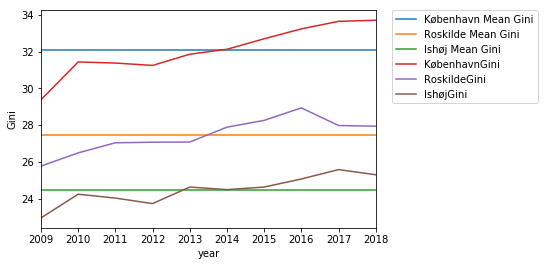

In [438]:
municipalities2 = ['København','Roskilde','Ishøj']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for m in municipalities2:
    gini_test.xs(m).plot(x='year',y='gini_mean',ax=ax,label=m + ' Mean Gini')

for m in municipalities2:
    gini_test.xs(m).plot(x='year',y='gini',ax=ax,label=m + 'Gini')

ax.legend(frameon=True)
ax.set_ylabel('Gini')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [450]:
#Here we look at the 5 municipalities with the highest gini koeffcient
gini_2018 = gini_test.loc[(gini_test['year'] == 2018), :]
gini_large = gini_2018.loc[(gini_2018['gini_mean'] > 33), :]
gini_large.head(8)

,year,gini,gini_mean,diff
municipality,,,,
Frederiksberg,2018,35.42,33.926,1.494
Gentofte,2018,44.50,44.090,0.410
Hørsholm,2018,38.48,37.928,0.552
Lyngby-Taarbæk,2018,36.61,34.655,1.955
Rudersdal,2018,41.51,39.863,1.647


# Analysis

To get a overview of the wage increase in different municipalities we look at the increase since the minimum wage level, which is at the start of the period in 2009. Then we find the municipalities with the largest and smallets level change and put them in a graph and a table. 

In [431]:
wage_min = wage_grouped.min()
wage_min.name = 'wage_min'
wage_test2 = wage_long.set_index('municipality').join(wage_min, how='left')
wage_test2['change'] = wage_test2.wage - wage_test2.wage_min
wage_change = wage_test2.loc[(wage_test2['year'] == 2018), :]
wage_change.head(10)

,year,wage,wage_min,change
municipality,,,,
Aabenraa,2018,37806,33192,4614
Aalborg,2018,40309,34294,6015
Aarhus,2018,42623,35921,6702
Albertslund,2018,39882,34895,4987
Allerød,2018,52694,45247,7447
Assens,2018,38415,33073,5342
Ballerup,2018,44641,38193,6448
Billund,2018,39139,32860,6279
Bornholm,2018,35733,31468,4265


In [435]:
wage_change_large = wage_change.loc[(wage_change['change'] > 8500), :]
wage_change_large.head(20)

,year,wage,wage_min,change
municipality,,,,
Dragør,2018,52807,43215,9592
Gentofte,2018,60720,50186,10534
Hørsholm,2018,59484,50949,8535
Lyngby-Taarbæk,2018,54920,45477,9443
Rudersdal,2018,60019,50057,9962


In [433]:
wage_change_low = wage_change.loc[(wage_change['change'] < 4400), :]
wage_change_low.head(10)

,year,wage,wage_min,change
municipality,,,,
Bornholm,2018,35733,31468,4265
Hjørring,2018,37209,32953,4256
Ishøj,2018,37748,33619,4129
Langeland,2018,35101,31500,3601
Lolland,2018,35732,31450,4282


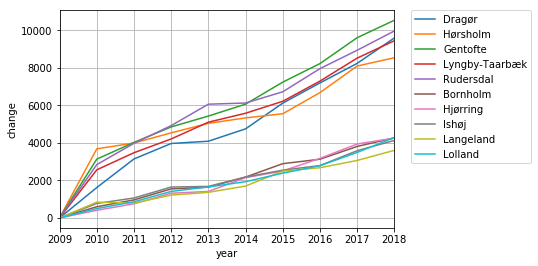

In [434]:
municipalities_2 = ['Dragør','Hørsholm','Gentofte','Lyngby-Taarbæk','Rudersdal', 'Bornholm', 'Hjørring', 'Ishøj', 'Langeland', 'Lolland']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for m in municipalities_2:
    wage_test2.xs(m).plot(x='year',y='change',ax=ax,label=m)


ax.legend(frameon=True)
ax.set_ylabel('change')
ax.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Conclusion

After analyzing our data we can conclude that the municipalities with the highest wages (Table1) also has the largest level increase in wages during the period (Table2), and the largest gini (Table3). Both **Gentofte**, **Hørsholm**, **Lyngby-Taarbæk**, and **Rudersdal** is included in all three catagories. Suggesting that higher wages, high inequality and large increases in the wage level in correlated for danish municipalities. 

In [453]:
print('Table1')
wage_rich2018.head()

Table 1


,year,wage,wage_mean,diff
municipality,,,,
Furesø,2018,53424,50131.5,3292.5
Gentofte,2018,60720,56095.5,4624.5
Hørsholm,2018,59484,56092.5,3391.5
Lyngby-Taarbæk,2018,54920,50716.1,4203.9
Rudersdal,2018,60019,55806.4,4212.6


In [458]:
print('Table2')
wage_change_large.head()

Table2


,year,wage,wage_min,change
municipality,,,,
Dragør,2018,52807,43215,9592
Gentofte,2018,60720,50186,10534
Hørsholm,2018,59484,50949,8535
Lyngby-Taarbæk,2018,54920,45477,9443
Rudersdal,2018,60019,50057,9962


In [457]:
print('Table3')
gini_large.head()

Table3


,year,gini,gini_mean,diff
municipality,,,,
Frederiksberg,2018,35.42,33.926,1.494
Gentofte,2018,44.50,44.090,0.410
Hørsholm,2018,38.48,37.928,0.552
Lyngby-Taarbæk,2018,36.61,34.655,1.955
Rudersdal,2018,41.51,39.863,1.647
